In [40]:
#necessary import
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#loading dataset
#here we use tensorflow's cifar dataset for image classification
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [42]:
#check the shape of traning dataset
x_train.shape

(50000, 32, 32, 3)

In [43]:
#check the shape of test dataset
x_test.shape

(10000, 32, 32, 3)

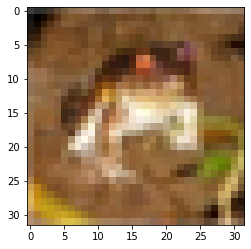

In [44]:
#show a single image from the trainign dataset
plt.imshow(x_train[0])

In [45]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [46]:
#reshape y_train
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [47]:
#there are 10 classes in the dataset
classes= ["airplae", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [100]:
#define a function to show the image with its class name from the training dataset
def show_sample(X, y, index):
  plt.figure(figsize=(15,2)) #reducing the image size for clear imshow
  plt.imshow(X[index])
  plt.xlabel('ClasseName: '+classes[y[index]])

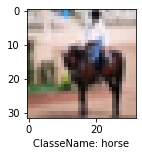

In [101]:
#show a sample from training images
show_sample(x_train, y_train, 11)

In [50]:
# normalize the values of x_train and x_test 
# since the values are in the range of 0-255
# devide each elemnet by 255 to normalize to a range of 0-1
x_train = x_train/255
x_test = x_test/255


In [57]:
# creating the cnn model
cnn_model = models.Sequential([
                         #first set of conv+pooling with 32 filters of size 3x3
                         layers.Conv2D(filters=32, kernel_size= (3,3), activation='relu', input_shape= (32,32,3)),
                         layers.MaxPool2D(2,2),
                         #second set of conv+pooling with 32 filters of size 3x3
                         layers.Conv2D(filters=32, kernel_size= (3,3), activation='relu'), 
                         layers.MaxPool2D(2,2),

                         #flat after after conv+pooling
                         layers.Flatten(),
                         #dense layer with 64 neurons/units and relu activation function
                         layers.Dense(64, activation='relu'),

                         #last/output dense layer with 10 neurons/units since there are 10 y_train classes
                         #activation function is softmax for probality distribution
                         layers.Dense(10, activation='softmax')                    
                         ])

In [58]:
#add optimizer(adam) and loss function to cnn model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [59]:
#train/fit the model with training data x_train,y_train
cnn_model.fit(x_train, y_train, epochs=10) 

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5315 - accuracy: 0.4516
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.2128 - accuracy: 0.5735
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0886 - accuracy: 0.6184
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0071 - accuracy: 0.6474
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9543 - accuracy: 0.6670
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9020 - accuracy: 0.6844
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8617 - accuracy: 0.6992
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8236 - accuracy: 0.7111
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7919 - accuracy: 0.7226
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [60]:
#save the model after training is done 
cnn_model.save('image_classification_cnn.model')

INFO:tensorflow:Assets written to: image_classification_cnn.model/assets


In [62]:
#load the pretrained model model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
trained_cnn_model = models.load_model('image_classification_cnn.model')

In [65]:
#reshape the test data same as done above for the train sample
#reshape y_test
y_test=y_test.reshape(-1,)

Class Index: 0


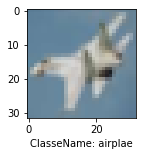

In [102]:
#show an image with its classname from test samples using show_sample() function defined above 
print('Class Index: '+str(y_test[10]))
show_sample(x_test, y_test, 10) 

In the image sample ClassName is 'airplane' and ClassIndex is 0

In [104]:
#use trained_cnn_model to predict the t_test
predictions = trained_cnn_model.predict([x_test])

In [106]:
type(predictions)

numpy.ndarray

predictions is numpy array containing the predicted y_test values for the x_test samples

In [130]:
# Check the y value(class_index) prediction for the index 10 of x_test which lies in predictions[10]
print('ClassIndex for sample in x_test[10]:'+str(np.argmax(predictions[10])))
classindex= int(np.argmax(predictions[10]))
print('ClassName: '+classes[classindex])



ClassIndex for sample in x_test[10]:0
ClassName: airplae


In [132]:
#evaluate overall performance of the cnn_model
(validation_loss, validation_accuracy) = trained_cnn_model.evaluate(x_test, y_test)
print('Loss: '+ str(validation_loss))
print('accuracy: '+ str(validation_accuracy))

313/313 [==============================] - 3s 11ms/step - loss: 0.9418 - accuracy: 0.6815
Loss: 0.9417755603790283
accuracy: 0.6815000176429749
